#PyTorch Workflow

In [ ]:
what_were_covering={1: "data (prepare and load)",
                    2: "build model",
                    3: "fitting the model to data (training)",
                    4: "making predictions and evaluting a model (interface)",
                    5: "saving and loading a model",
                    6: "putting it all together"}
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluting a model (interface)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt
torch.__version__

# *№1* data (prepare and load)

In [ ]:
weight = 0.7
bias =0.3

start=0
end=1
step =0.02
X= torch.arange(start, end, step).unsqueeze(dim=1)
Y=weight*X + bias

X[:10], Y[:10], len(X), len(Y)

In [ ]:
len(X), len(Y)

#Test sets

In [ ]:
train_split=int(0.8*len(X))
X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test = X[train_split:], Y[train_split:]

len(X_train), len(Y_train), len(X_test), len(Y_test)

In [ ]:
X_train, Y_train

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=Y_train,
                     test_data=X_test,
                     test_labels=Y_test,
                     predictions=None):
    """
    Plots training data, test data and compare predictions
    """
    plt.figure(figsize=(10, 7))

    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    plt.legend(prop={"size":14})


In [ ]:
plot_predictions();

#Build model

In [ ]:
import torch
from torch import nn

class LinearRegressionModel(nn.Module):
  def __init__(self):
     super().__init__()
     self.weights=nn.Parameter(torch.randn(1,
                                          requires_grad=True,
                                          dtype=torch.float))
     self.bias=nn.Parameter(torch.randn(1,
                                          requires_grad=True,
                                          dtype=torch.float))

  def forward(self, x: torch.Tensor)->torch.Tensor:
      return self.weights *x+self.bias




In [ ]:
#model_0.state_dict()

In [ ]:
torch.randn(1)

In [ ]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
list(model_0.parameters())


In [ ]:
model_0.state_dict()

In [ ]:
weight, bias

In [ ]:
X_test, Y_test

In [ ]:
y_preds=model_0(X_test)
y_preds

In [ ]:
model_0 = LinearRegressionModel()
with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds


In [ ]:
Y_test

In [ ]:
plot_predictions(predictions=y_preds)

#Train model

In [ ]:
model_0.parameters()

In [ ]:
list(model_0.parameters())

In [ ]:
model_0.state_dict()

In [ ]:
loss_fn=nn.L1Loss()

optimizer=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.1)

#Building a training loop on PyTorch

In [ ]:
list(model_0.eval().parameters())

[Parameter containing:
 tensor([0.2345], requires_grad=True),
 Parameter containing:
 tensor([0.2303], requires_grad=True)]

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.2345], requires_grad=True),
 Parameter containing:
 tensor([0.2303], requires_grad=True)]

In [ ]:
loss_fn=nn.L1Loss()

optimizer=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.01)

In [ ]:
from ast import mod
epochs=100

for epoch in range(epochs):
  model_0.train()

  y_pred =model_0(X_train)
  loss=loss_fn(y_pred, Y_train)
  print(f"Epoch {epoch}, Loss: {loss.item()}")

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    #with torch.no_grad():
      test_pred=model_0(X_test)
      test_loss=loss_fn(test_pred, Y_test)
  if (epoch + 1) % 10 == 0:
    print(f"Epoch:{epoch+1} | Loss:{loss} | Test loss:{test_loss}")

print(model_0.state_dict())



Epoch 0, Loss: 0.25122663378715515
Epoch 1, Loss: 0.2397056519985199
Epoch 2, Loss: 0.22818461060523987
Epoch 3, Loss: 0.2166636437177658
Epoch 4, Loss: 0.20514264702796936
Epoch 5, Loss: 0.1936216503381729
Epoch 6, Loss: 0.18210068345069885
Epoch 7, Loss: 0.17059633135795593
Epoch 8, Loss: 0.16010764241218567
Epoch 9, Loss: 0.150575190782547
Epoch:10 | Loss:0.150575190782547 | Test loss:0.3523210883140564
Epoch 10, Loss: 0.14193940162658691
Epoch 11, Loss: 0.13414055109024048
Epoch 12, Loss: 0.1271185278892517
Epoch 13, Loss: 0.1208127960562706
Epoch 14, Loss: 0.11522618681192398
Epoch 15, Loss: 0.10992656648159027
Epoch 16, Loss: 0.10522427409887314
Epoch 17, Loss: 0.10105693340301514
Epoch 18, Loss: 0.09736667573451996
Epoch 19, Loss: 0.09395559877157211
Epoch:20 | Loss:0.09395559877157211 | Test loss:0.2586209177970886
Epoch 20, Loss: 0.09095562994480133
Epoch 21, Loss: 0.08830587565898895
Epoch 22, Loss: 0.0858907550573349
Epoch 23, Loss: 0.08375857770442963
Epoch 24, Loss: 0.0819

In [ ]:
with torch.inference_mode():
  y_preds_new=model_0(X_test)

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.4701])), ('bias', tensor([0.3963]))])

In [ ]:
weight, bias

(0.7, 0.3)

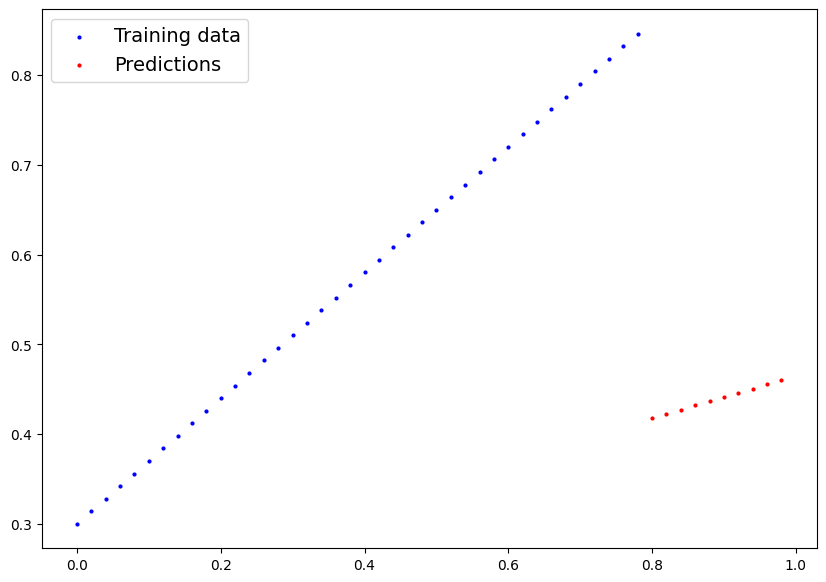

In [ ]:
plot_predictions(predictions=y_preds);

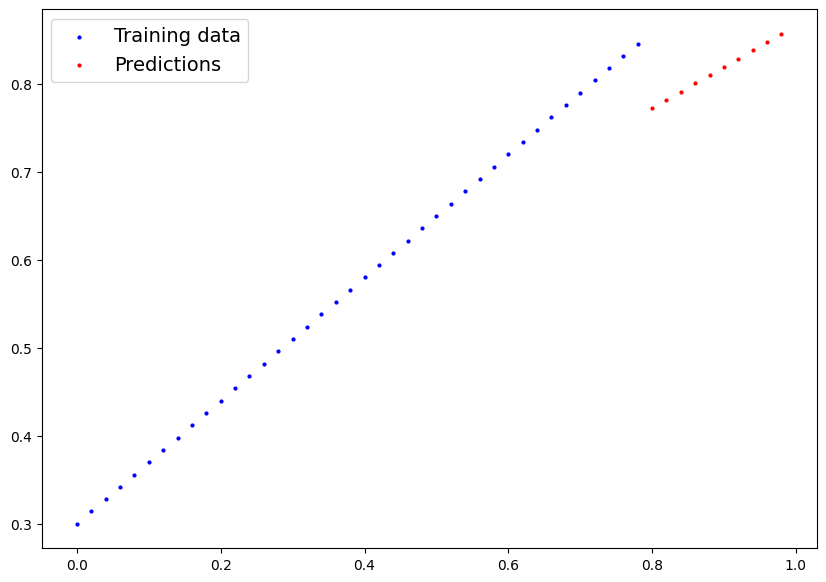

In [ ]:
plot_predictions(predictions=y_preds_new);

#Saving a model in PyTorch

In [ ]:
from pathlib import Path

MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME="Untitled1.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME
MODEL_SAVE_PATH

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)


Saving model to: models/Untitled1.pth


In [ ]:
!ls -l models/

total 4
-rw-r--r-- 1 root root 1508 Jun 22 14:12 Untitled1.pth


In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.4701])), ('bias', tensor([0.3963]))])

In [ ]:
loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.4701])), ('bias', tensor([0.3963]))])

In [ ]:
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.7724],
        [0.7818],
        [0.7912],
        [0.8006],
        [0.8101],
        [0.8195],
        [0.8289],
        [0.8383],
        [0.8477],
        [0.8571]])

In [ ]:
y_preds==loaded_model_preds

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])

In [ ]:
y_preds

tensor([[0.4179],
        [0.4226],
        [0.4273],
        [0.4320],
        [0.4367],
        [0.4413],
        [0.4460],
        [0.4507],
        [0.4554],
        [0.4601]])

In [ ]:
model_0.eval()
with torch.inference_mode():
  y_preds=model_0(X_test)
y_preds

tensor([[0.7724],
        [0.7818],
        [0.7912],
        [0.8006],
        [0.8101],
        [0.8195],
        [0.8289],
        [0.8383],
        [0.8477],
        [0.8571]])

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.6.0+cu124'

In [ ]:
device="cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")


Using device: cuda


In [ ]:
!nvidia-smi

Sun Jun 22 14:12:03 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   57C    P8             13W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

#Data

In [ ]:
weight=0.7
bias=0.3

start=0
end=1
step=0.02

X=torch.arange(start, end, step).unsqueeze(dim=1)
y=weight*X+bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
train_split=int(0.8*len(X))
X_train, Y_train = X[:train_split], y[:train_split]
X_test, Y_test = X[train_split:], y[train_split:]
len(X_train), len(Y_train), len(X_test), len(Y_test)

(40, 40, 10, 10)

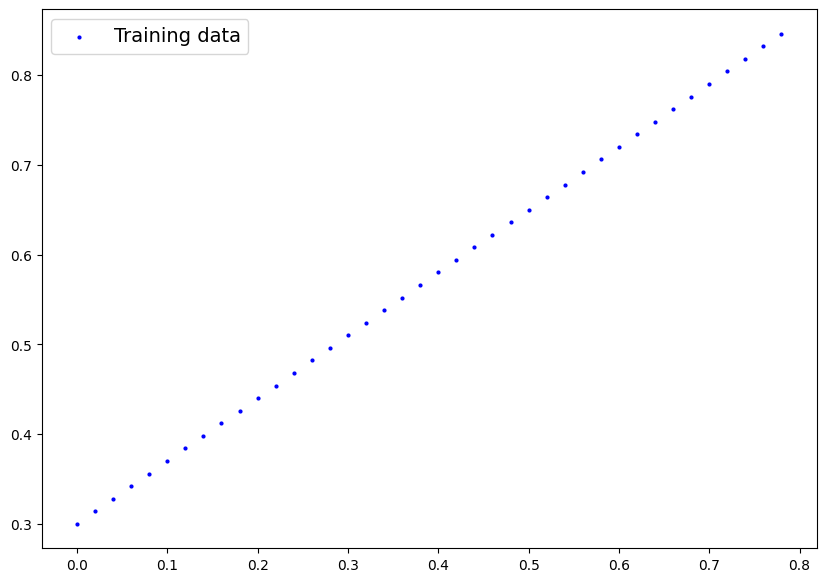

In [ ]:
plot_predictions(X_train, Y_train, X_test, Y_test)

#Building a PyTorch Linear model

In [ ]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer=nn.Linear(in_features=1,
                                out_features=1)

  def forward(self,x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [ ]:
X_train[:5], Y_train[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [ ]:
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
model_1. to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

#Training

In [ ]:
loss_fn=nn.L1Loss()

optimizer=torch.optim.SGD(params=model_1.parameters(),
                          lr=0.1)

In [ ]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.01)

torch.manual_seed(42)
epochs = 200

X_train = X_train.to(device)
Y_train = Y_train.to(device)
X_test = X_test.to(device)
Y_test = Y_test.to(device)

for epoch in range(epochs):
    model_1.train()
    y_pred = model_1(X_train)
    loss = loss_fn(y_pred, Y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)
        test_loss = loss_fn(test_pred, Y_test)

    if epoch % 10 == 0:
        print(f"Epoch:{epoch} | Loss:{loss.item():.6f} | Test loss:{test_loss.item():.6f}")


Epoch:0 | Loss:0.308445 | Test loss:0.327686
Epoch:10 | Loss:0.193251 | Test loss:0.193767
Epoch:20 | Loss:0.121194 | Test loss:0.112706
Epoch:30 | Loss:0.076118 | Test loss:0.064117
Epoch:40 | Loss:0.047917 | Test loss:0.035377
Epoch:50 | Loss:0.030273 | Test loss:0.018689
Epoch:60 | Loss:0.019232 | Test loss:0.009257
Epoch:70 | Loss:0.012320 | Test loss:0.004140
Epoch:80 | Loss:0.007991 | Test loss:0.001548
Epoch:90 | Loss:0.005279 | Test loss:0.000399
Epoch:100 | Loss:0.003577 | Test loss:0.000047
Epoch:110 | Loss:0.002508 | Test loss:0.000108
Epoch:120 | Loss:0.001834 | Test loss:0.000364
Epoch:130 | Loss:0.001407 | Test loss:0.000689
Epoch:140 | Loss:0.001136 | Test loss:0.001018
Epoch:150 | Loss:0.000962 | Test loss:0.001318
Epoch:160 | Loss:0.000848 | Test loss:0.001576
Epoch:170 | Loss:0.000772 | Test loss:0.001788
Epoch:180 | Loss:0.000721 | Test loss:0.001956
Epoch:190 | Loss:0.000684 | Test loss:0.002086


In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.5933]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3487], device='cuda:0'))])

In [ ]:
weight, bias

(0.7, 0.3)

In [ ]:
model_1.eval()

with torch.inference_mode():
  y_peds=model_1(X_test)
y_preds

tensor([[0.7724],
        [0.7818],
        [0.7912],
        [0.8006],
        [0.8101],
        [0.8195],
        [0.8289],
        [0.8383],
        [0.8477],
        [0.8571]])

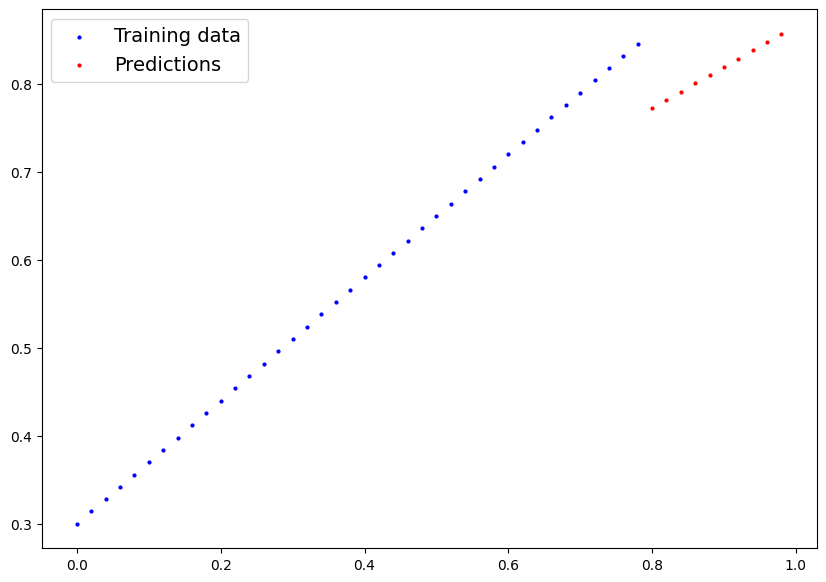

In [ ]:
plot_predictions(predictions=y_preds.cpu())

#Saving and loading a trained model

In [ ]:
from pathlib import Path

MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME="Untitled1_1.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME
MODEL_SAVE_PATH

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)


Saving model to: models/Untitled1_1.pth


In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.5933]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3487], device='cuda:0'))])

In [ ]:
loaded_model_1 = LinearRegressionModelV2()
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model_1.to(device)


LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds=loaded_model_1(X_test)
y_preds==loaded_model_1_preds

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!